# Lending Club loan data

El presente proyecto tiene como objetivo probar diferentes modelos de aprendizaje automático para determinar si un cliente tendrá problemas con el pago de su deuda o no,  de acuerdo a diversas características como el riesgo o incumplimiento por parte del prestatario a lo largo de los años.

https://www.kaggle.com/wordsforthewise/lending-club

In [1]:
import io
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import clone
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, plot_confusion_matrix, classification_report
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%ls

sample_data/


In [180]:
loans = pd.read_csv('data_acc_200k.csv', low_memory=True)
loans.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0,39651438,NaN,32000.0,32000.0,32000.0,60 months,10.49,687.65,B,B3,Public Service,10+ years,MORTGAGE,120000.0,Verified,Feb-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,919xx,CA,24.05,0.0,Oct-1981,735.0,739.0,0.0,NaN,NaN,20.0,0.0,39687.0,57.8,42.0,w,7181.91,...,556496.0,103647.0,64100.0,72197.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1,16411620,NaN,9600.0,9600.0,9600.0,36 months,12.99,323.42,C,C1,NaN,NaN,RENT,21900.0,Verified,May-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,331xx,FL,10.03,0.0,Apr-2001,685.0,689.0,1.0,NaN,118.0,13.0,1.0,4509.0,38.9,20.0,w,0.00,...,11600.0,4509.0,2400.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2,45122316,NaN,4000.0,4000.0,4000.0,36 months,6.68,122.93,A,A3,System Analyst,4 years,MORTGAGE,83000.0,Not Verified,Apr-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,333xx,FL,19.53,0.0,Sep-2003,780.0,784.0,0.0,NaN,NaN,16.0,0.0,1564.0,17.2,25.0,w,0.00,...,222616.0,64253.0,5600.0,76154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,3,125356772,NaN,6025.0,6025.0,6025.0,36 months,10.91,197.00,B,B4,Admin assistant,10+ years,RENT,52000.0,Not Verified,Dec-2017,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,021xx,MA,9.16,1.0,Jun-2005,740.0,744.0,1.0,15.0,NaN,11.0,0.0,2706.0,12.8,25.0,w,0.00,...,32227.0,5559.0,11000.0,11127.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,4,128490686,NaN,25000.0,25000.0,25000.0,60 months,26.30,752.96,E,E5,Coordinator,10+ years,OWN,65000.0,Verified,Feb-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,926xx,CA,36.26,0.0,Jul-1999,715.0,719.0,1.0,37.0,NaN,19.0,0.0,49461.0,24.7,33.0,w,21954.14,...,257219.0,97647.0,179400.0,65719.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
loans.shape

(226070, 152)

In [182]:
loans.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=152)

In [183]:
loans.isnull().sum()

Unnamed: 0                    0
id                            0
member_id                226070
loan_amnt                     4
funded_amnt                   4
                          ...  
settlement_status        222601
settlement_date          222601
settlement_amount        222601
settlement_percentage    222601
settlement_term          222601
Length: 152, dtype: int64

In [184]:
loans['int_rate'].value_counts()

11.99    5331
5.32     4675
10.99    4449
13.99    4319
11.49    3223
         ... 
19.41       1
20.77       1
22.06       1
9.20        1
16.65       1
Name: int_rate, Length: 605, dtype: int64

In [185]:
loans['loan_status'].value_counts()

Fully Paid                                             107427
Current                                                 87960
Charged Off                                             26875
Late (31-120 days)                                       2256
In Grace Period                                           850
Late (16-30 days)                                         451
Does not meet the credit policy. Status:Fully Paid        173
Does not meet the credit policy. Status:Charged Off        70
Default                                                     4
Name: loan_status, dtype: int64

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(x='loan_status', data=loans, ax=axes[0])
sns.distplot(loans['loan_amnt'], kde=False, bins=40, ax=axes[1])
sns.despine()
axes[0].set(xlabel='Status', ylabel='')
axes[0].set_title('Count of Loan Status', size=20)
axes[1].set(xlabel='Loan Amount', ylabel='')
axes[1].set_title('Loan Amount Distribution', size=20)

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.scatterplot(x='installment', y='loan_amnt', data=loans, ax=axes[0])
sns.boxplot(x='loan_status', y='loan_amnt', data=loans, ax=axes[1])
sns.despine()
axes[0].set(xlabel='Installment', ylabel='Loan Amount')
axes[0].set_title('Scatterplot between Loan Amount and Installment', size=15)
axes[1].set(xlabel='Loan Status', ylabel='Loan Amount')
axes[1].set_title('Boxplot between Loan Amount and Loan Status', size=15)

In [ ]:
loans.dtypes

In [ ]:
loans.isna().mean().sort_values()

In [ ]:
loans = loans.drop(loans.loc[:, loans.isna().mean().sort_values() > 0.3].columns, axis=1)
loans.shape

In [ ]:
loans.isna().mean()

In [ ]:
loans['dti']

0       24.05
1       10.03
2       19.53
3        9.16
4       36.26
        ...  
2808    10.72
2809    13.45
2810    11.05
2811     3.30
2812      NaN
Name: dti, Length: 2813, dtype: float64

Text(0.5, 1.0, 'Normal Distribution Histogram')

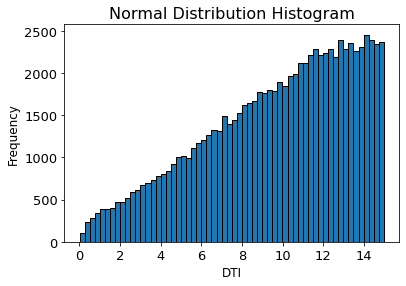

In [186]:
import matplotlib.pyplot as plt
var=loans.loc[(loans['dti'] > 0) & (loans['dti'] < 15)]
plt.hist(var['dti'], bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.xlabel('DTI',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Normal Distribution Histogram',fontsize=16)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

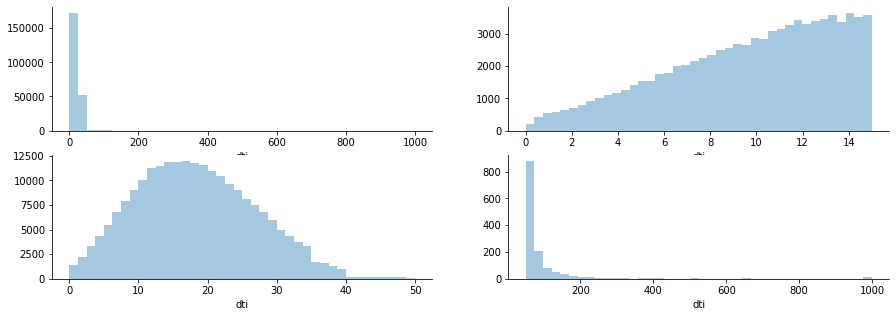

In [187]:
f, axes = plt.subplots(2, 2, figsize=(15,5))
sns.distplot(loans['dti'], kde=False, bins=40, ax=axes[0][0])
var=loans.loc[(loans['dti'] > 0) & (loans['dti'] < 15)]
sns.distplot(var['dti'], kde=False, bins=40, ax=axes[0][1])
var=loans.loc[(loans['dti'] > 0) & (loans['dti'] < 50)]
sns.distplot(var['dti'], kde=False, bins=40, ax=axes[1][0])
var=loans.loc[(loans['dti'] > 50) & (loans['dti'] < 9999)]
sns.distplot(var['dti'], kde=False, bins=40, ax=axes[1][1])
sns.despine()

In [188]:
loans['loan_amnt'].value_counts()

10000.0    18605
20000.0    13269
15000.0    12276
12000.0    12208
35000.0     8660
           ...  
37125.0        1
33675.0        1
37850.0        1
36925.0        1
32775.0        1
Name: loan_amnt, Length: 1507, dtype: int64

In [189]:
loans['term'].value_counts()

 36 months    160800
 60 months     65266
Name: term, dtype: int64

Text(15.835887896825405, 0.5, 'loan_amnt')

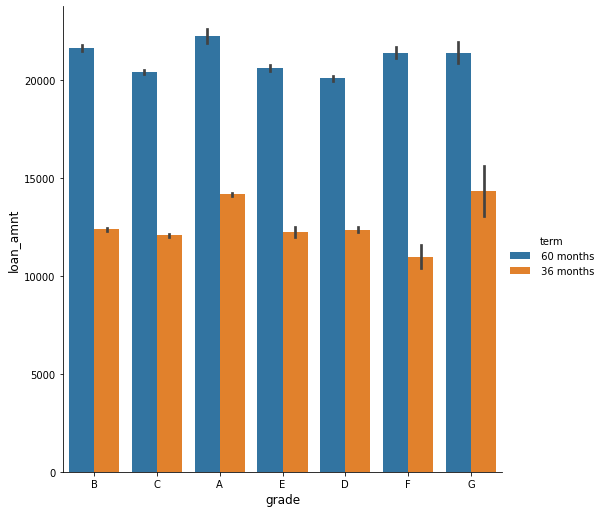

In [190]:
sns.catplot(x="grade", y="loan_amnt", hue="term", kind="bar", data=loans,height = 7, aspect = 1)
plt.xlabel("grade",fontsize=12)
plt.ylabel("loan_amnt",fontsize=12)

Text(1.6424479166666615, 0.5, '')

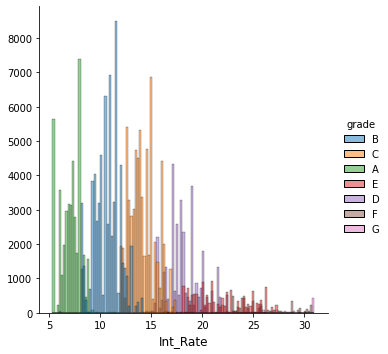

In [202]:
#f, axe = plt.subplots(figsize=(10,6))
b=sns.displot(loans, x="int_rate", hue="grade", height = 5, aspect = 1, kde=False)
plt.xlabel("Int_Rate",fontsize=12)
plt.ylabel("",fontsize=12)
#plt.title('Distribución de la tasa de interés cobrada por cada grado del préstamo',fontsize=16)

In [199]:
loans['int_rate'].value_counts()

11.99    5331
5.32     4675
10.99    4449
13.99    4319
11.49    3223
         ... 
19.41       1
20.77       1
22.06       1
9.20        1
16.65       1
Name: int_rate, Length: 605, dtype: int64

In [192]:
loans['application_type'].value_counts()

Individual    213960
Joint App      12106
Name: application_type, dtype: int64

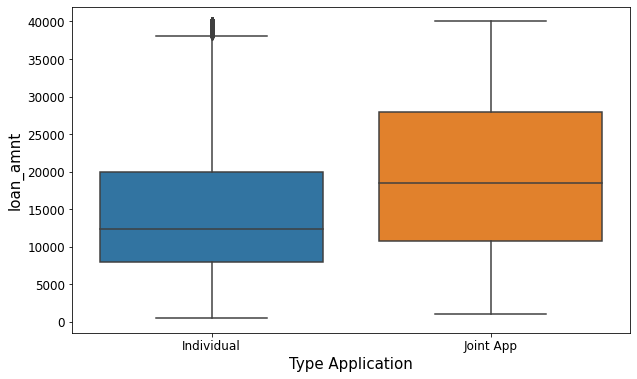

In [193]:
f, axe = plt.subplots(figsize=(10,6))
b=sns.boxplot(x='application_type', y='loan_amnt', data=loans,ax=axe)
b.set_xlabel("Type Application",fontsize=15)
b.set_ylabel("loan_amnt",fontsize=15)
b.tick_params(labelsize=12)

In [194]:
loans.loc[loans['loan_status']=='Does not meet the credit policy. Status:Charged Off','loan_status']='DMCP: Charged Off'
loans.loc[loans['loan_status']=='Does not meet the credit policy. Status:Fully Paid','loan_status']='DMCP:Fully Paid'

In [195]:
loans['loan_status'].value_counts()

Fully Paid            107427
Current                87960
Charged Off            26875
Late (31-120 days)      2256
In Grace Period          850
Late (16-30 days)        451
DMCP:Fully Paid          173
DMCP: Charged Off         70
Default                    4
Name: loan_status, dtype: int64

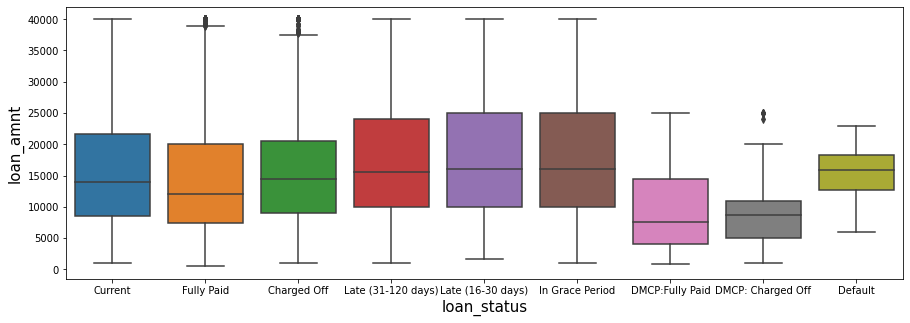

In [198]:
#tips = sns.load_dataset("tips")
f, axes = plt.subplots(1, 1, figsize=(15,5))
b = sns.boxplot(x='loan_status', y='loan_amnt', data=loans, ax=axes)
b.set_xlabel("loan_status",fontsize=15)
b.set_ylabel("loan_amnt",fontsize=15)
b.tick_params(labelsize=10)

[Text(0, 0.5, ''), Text(0.5, 0, 'Loan Status')]

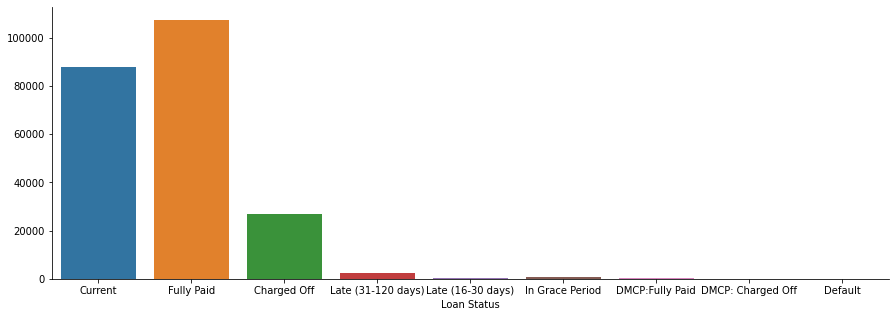

In [197]:
f, axes = plt.subplots(figsize=(15,5))
sns.countplot(x='loan_status', data=loans, ax=axes)
sns.despine()
axes.set(xlabel='Loan Status', ylabel='')
#axes.set_title('Count of Loan Status', size=20)

[Text(0, 0.5, ''), Text(0.5, 0, 'grade')]

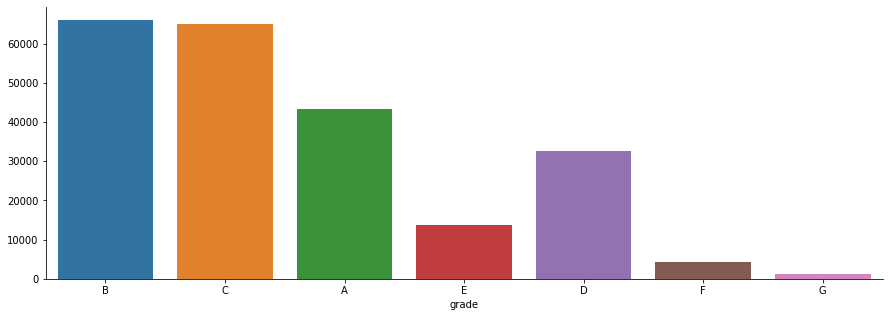

In [201]:
f, axes = plt.subplots(figsize=(15,5))
sns.countplot(x='grade', data=loans, ax=axes)
sns.despine()
axes.set(xlabel='grade', ylabel='')
#axes.set_title('Count of Loan Status', size=20)

In [ ]:
from sklearn.model_selection import train_test_split

X_loans = loans.drop('loan_status', axis=1)
Y_loans = loans['loan_status']

X_train, X_val, y_train, y_val = train_test_split(X_loans, Y_loans, test_size=0.2, random_state=0)

In [ ]:
X_train.shape

(180856, 151)

In [ ]:
X_val.shape

(45214, 151)